In [45]:
import sidrapy as sidra
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

In [46]:
df = sidra.get_table('4714', 3, 'all')

In [47]:
df.head()

,NC,NN,MC,MN,V,D1C,D1N,D2C,D2N,D3C,D3N
0,Nível Territorial (Código),Nível Territorial,Unidade de Medida (Código),Unidade de Medida,Valor,Unidade da Federação (Código),Unidade da Federação,Ano (Código),Ano,Variável (Código),Variável
1,3,Unidade da Federação,45,Pessoas,1581196,11,Rondônia,2022,2022,93,População residente
2,3,Unidade da Federação,26,Quilômetros quadrados,237754.172,11,Rondônia,2022,2022,6318,Área da unidade territorial
3,3,Unidade da Federação,28,Habitante por quilômetro quadrado,6.65,11,Rondônia,2022,2022,614,Densidade demográfica
4,3,Unidade da Federação,45,Pessoas,830018,12,Acre,2022,2022,93,População residente


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NC      82 non-null     object
 1   NN      82 non-null     object
 2   MC      82 non-null     object
 3   MN      82 non-null     object
 4   V       82 non-null     object
 5   D1C     82 non-null     object
 6   D1N     82 non-null     object
 7   D2C     82 non-null     object
 8   D2N     82 non-null     object
 9   D3C     82 non-null     object
 10  D3N     82 non-null     object
dtypes: object(11)
memory usage: 7.2+ KB


In [49]:
df = df.iloc[1:, [6, 4, 10]].reset_index(drop=True)

In [50]:
df.head()

,D1N,V,D3N
0,Rondônia,1581196,População residente
1,Rondônia,237754.172,Área da unidade territorial
2,Rondônia,6.65,Densidade demográfica
3,Acre,830018,População residente
4,Acre,164173.429,Área da unidade territorial


In [51]:
df = df.rename(columns={
    'D1N': 'uf',
    'V': 'valor',
    'D3N': 'criterio'
})

In [52]:
df.columns

Index(['uf', 'valor', 'criterio'], dtype='object')

In [53]:
df.dtypes

uf          object
valor       object
criterio    object
dtype: object

In [54]:
df['valor'] = df['valor'].astype(np.float64)

In [55]:
df.dtypes

uf           object
valor       float64
criterio     object
dtype: object

In [56]:
df['criterio'].value_counts()

criterio
População residente            27
Área da unidade territorial    27
Densidade demográfica          27
Name: count, dtype: int64

In [57]:
df_populacao = df.loc[df['criterio'] == 'População residente'].reset_index(drop=True)

df_populacao = df_populacao.rename(columns={
    'valor': 'populacao_uf'
})

df_populacao.head()

,uf,populacao_uf,criterio
0,Rondônia,1581196.0,População residente
1,Acre,830018.0,População residente
2,Amazonas,3941613.0,População residente
3,Roraima,636707.0,População residente
4,Pará,8120131.0,População residente


In [58]:
df_territorio = df.loc[df['criterio'] == 'Área da unidade territorial'].reset_index(drop=True)

df_territorio = df_territorio.rename(columns={
    'valor': 'area_territorial'
})

df_territorio.head()

,uf,area_territorial,criterio
0,Rondônia,237754.172,Área da unidade territorial
1,Acre,164173.429,Área da unidade territorial
2,Amazonas,1559255.881,Área da unidade territorial
3,Roraima,223644.530,Área da unidade territorial
4,Pará,1245870.704,Área da unidade territorial


In [59]:
df_densidade = df.loc[df['criterio'] == 'Densidade demográfica'].reset_index(drop=True)

df_densidade = df_densidade.rename(columns={
    'valor': 'densidade_demografica'
})

df_densidade.head()

,uf,densidade_demografica,criterio
0,Rondônia,6.65,Densidade demográfica
1,Acre,5.06,Densidade demográfica
2,Amazonas,2.53,Densidade demográfica
3,Roraima,2.85,Densidade demográfica
4,Pará,6.52,Densidade demográfica


In [60]:
mapa = gpd.read_file('BR_UF_2024/')

In [61]:
mapa = (
    mapa
    .merge(right=df_populacao, left_on='NM_UF', right_on='uf')
    .merge(right=df_territorio, on='uf')
    .merge(right=df_densidade, on='uf')
)

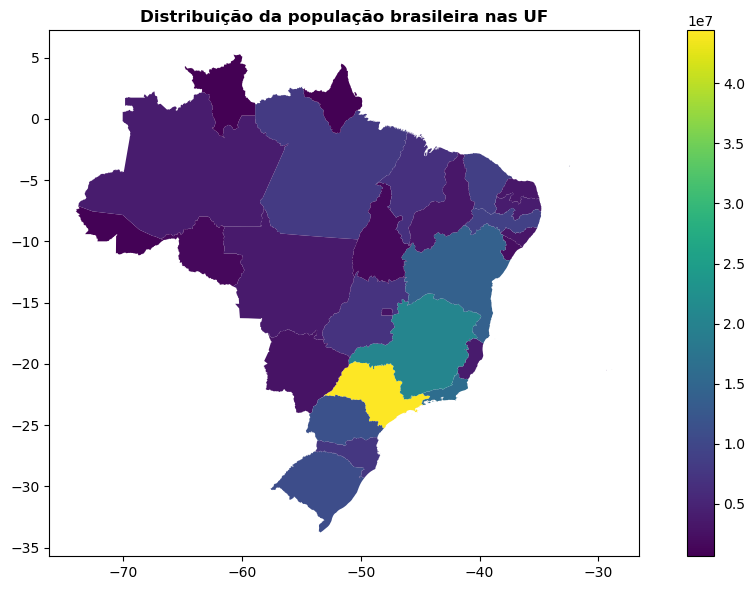

In [62]:
fig, ax = plt.subplots(figsize=(10, 6))

mapa.plot(
    column='populacao_uf',
    legend=True,
    ax=ax
)

ax.set_title('Distribuição da população brasileira nas UF', fontweight='bold')

plt.tight_layout()
plt.show()

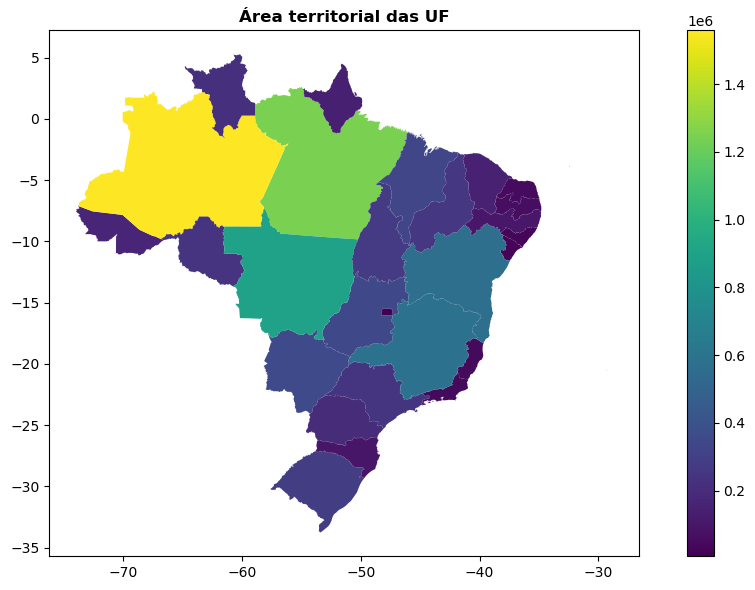

In [63]:
fig, ax = plt.subplots(figsize=(10, 6))

mapa.plot(
    column='area_territorial',
    legend=True,
    ax=ax
)

ax.set_title('Área territorial das UF', fontweight='bold')

plt.tight_layout()
plt.show()

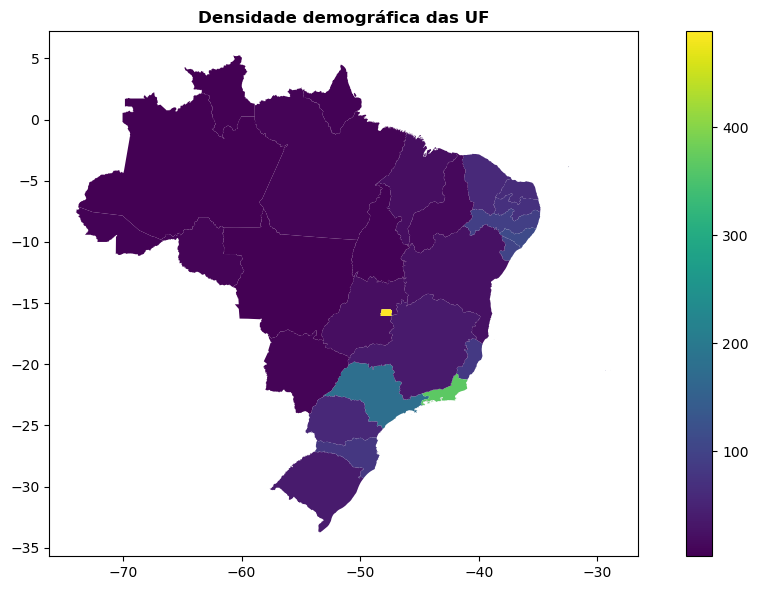

In [64]:
fig, ax = plt.subplots(figsize=(10, 6))

mapa.plot(
    column='densidade_demografica',
    legend=True,
    ax=ax
)

ax.set_title('Densidade demográfica das UF', fontweight='bold')

plt.tight_layout()
plt.show()

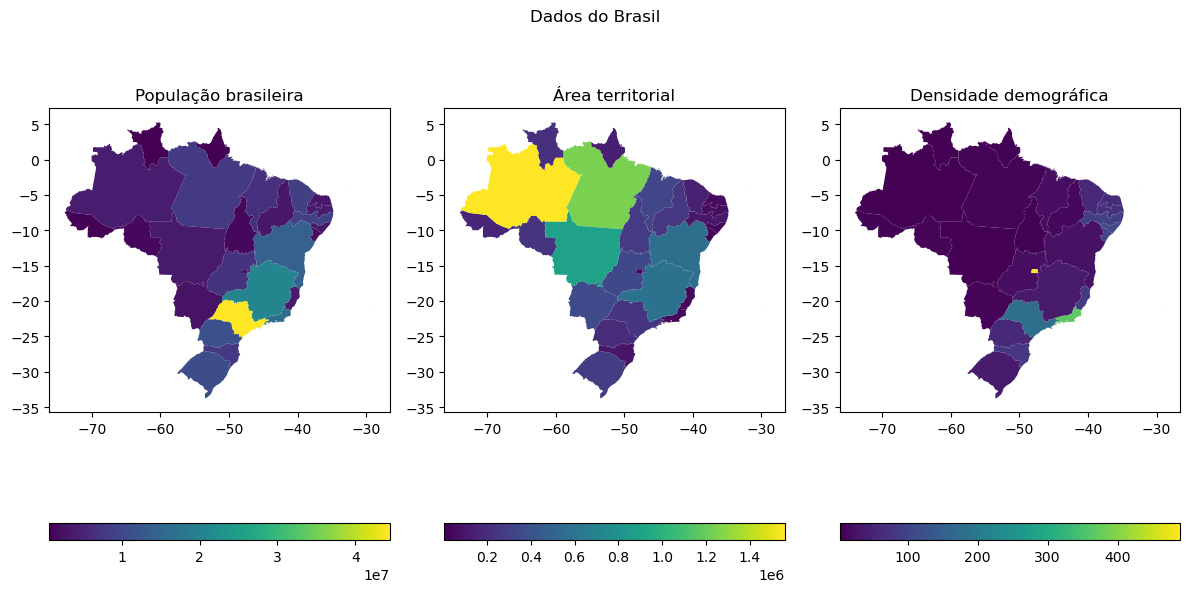

In [65]:
fig, ax = plt.subplots(1, 3, figsize=(12, 8))

mapa.plot(
    column='populacao_uf',
    legend=True,
    ax=ax[0],
    legend_kwds={
        'orientation': 'horizontal'
    }
)

mapa.plot(
    column='area_territorial',
    legend=True,
    ax=ax[1],
    legend_kwds={
        'orientation': 'horizontal'
    }
)

mapa.plot(
    column='densidade_demografica',
    legend=True,
    ax=ax[2],
    legend_kwds={
        'orientation': 'horizontal'
    }
)

titulos = [
    'População brasileira',
    'Área territorial',
    'Densidade demográfica'
]
for i, titulo in zip(range(3), titulos):
    ax[i].set_title(titulo)

plt.suptitle('Dados do Brasil', y=0.8)
fig.savefig('MapaCoropletico_PopulacaoUF_AreaTerritorialUF_DensidadeDemograficaUF.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()